In [2]:
!gdown 1ujSYC3tEC3VNoxqUIWO2PG7Lg5HAdYqn
!unzip models.zip

^C


'unzip' is not recognized as an internal or external command,
operable program or batch file.


Downloading...
From (original): https://drive.google.com/uc?id=1ujSYC3tEC3VNoxqUIWO2PG7Lg5HAdYqn
From (redirected): https://drive.google.com/uc?id=1ujSYC3tEC3VNoxqUIWO2PG7Lg5HAdYqn&confirm=t&uuid=30b37042-d1cc-4c7c-83bc-0b34758ebc40
To: d:\4-2\IOT Lab\ANPR_Server\bengali-alpr\models.zip

  0%|          | 0.00/305M [00:00<?, ?B/s]
  0%|          | 524k/305M [00:02<27:10, 186kB/s]
  0%|          | 1.05M/305M [00:05<27:11, 186kB/s]
  1%|          | 1.57M/305M [00:07<22:45, 222kB/s]
  1%|          | 2.10M/305M [00:09<19:51, 254kB/s]
  1%|          | 2.62M/305M [00:10<16:56, 297kB/s]
  1%|          | 3.15M/305M [00:11<15:31, 323kB/s]
  1%|          | 3.67M/305M [00:12<14:40, 342kB/s]
  1%|▏         | 4.19M/305M [00:14<13:22, 374kB/s]
  2%|▏         | 4.72M/305M [00:15<14:13, 351kB/s]
  2%|▏         | 5.24M/305M [00:17<13:36, 367kB/s]
  2%|▏         | 5.77M/305M [00:18<12:31, 397kB/s]
  2%|▏         | 6.29M/305M [00:18<10:22, 479kB/s]
  2%|▏         | 6.82M/305M [00:19<08:51, 560kB/s]
  2%|▏

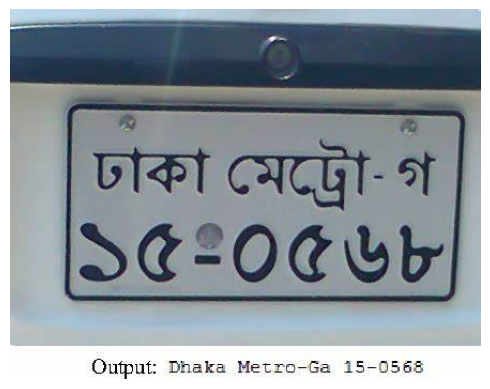

In [15]:
import utils
utils.show_image('images/test_image4.jpg')

('ঢাকা মেট্রো-গ', '১৫-০৫৬৮')


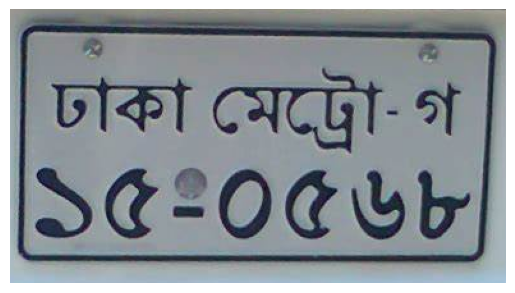

In [18]:
utils.detect_and_extract_lp_text('images/test_image4.jpg')

In [17]:
from flask import Flask, request, jsonify
import utils
from werkzeug.utils import secure_filename
import os

app = Flask(__name__)

# Configure upload folder and allowed extensions
UPLOAD_FOLDER = 'uploads'
ALLOWED_EXTENSIONS = {'jpg', 'jpeg', 'png'}
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

# Ensure upload folder exists
os.makedirs(UPLOAD_FOLDER, exist_ok=True)

def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS

@app.route('/detect_license_plate', methods=['POST'])
def detect_license_plate():
    try:
        # Check if an image file was provided
        if 'image' not in request.files:
            return jsonify({'error': 'No image provided'}), 400
        
        file = request.files['image']
        
        # Check if filename is valid and file type is allowed
        if file.filename == '':
            return jsonify({'error': 'No file selected'}), 400
        if not allowed_file(file.filename):
            return jsonify({'error': 'Invalid file type. Only jpg, jpeg, and png are allowed'}), 400

        # Save the uploaded file
        filename = secure_filename(file.filename)
        filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
        file.save(filepath)

        # Process the image using the utils function
        try:
            lp_text = utils.detect_and_extract_lp_text(filepath)
            # Delete the temporary file
            os.remove(filepath)
            return jsonify({'license_plate_text': lp_text}), 200
        except Exception as e:
            # Delete the temporary file
            os.remove(filepath)
            return jsonify({'error': f'Error processing image: {str(e)}'}), 500

    except Exception as e:
        return jsonify({'error': f'Server error: {str(e)}'}), 500

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.57.171:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

d:\4-2\IOT Lab\ANPR_Server\bengali-alpr\env\Lib\site-packages\IPython\core\interactiveshell.py:3678: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
